<a href="https://colab.research.google.com/github/ahzaidy/Programs/blob/main/CPSC_5410_HW2_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


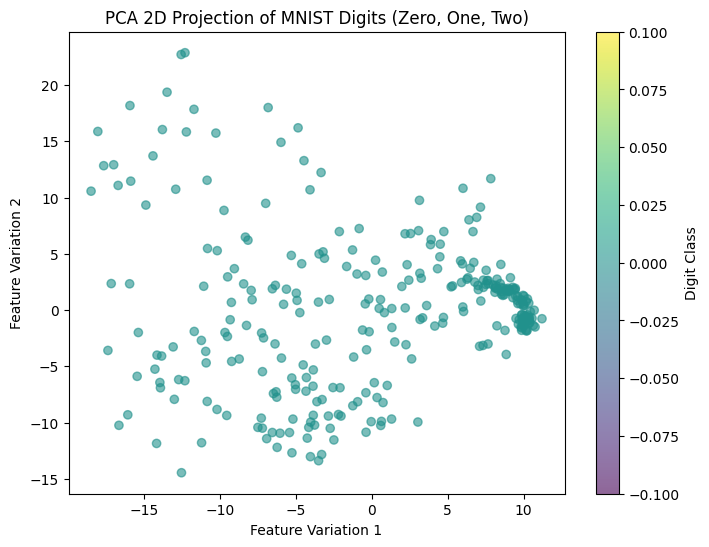

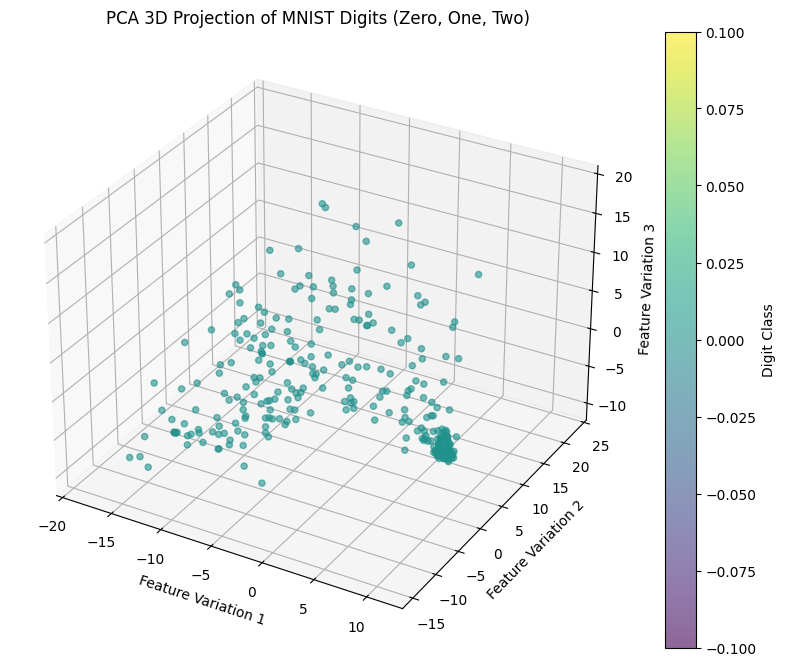

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/')

def load_data(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)
    # Extract labels and features
    labels = data.iloc[:, 0]
    features = data.iloc[:, 1:]
    return labels, features

def preprocess_data(features):
    # Standardize the features
    scaler = StandardScaler()
    return scaler.fit_transform(features)

def apply_pca(features_scaled, n_components):
    # Apply PCA
    pca = PCA(n_components=n_components)
    return pca.fit_transform(features_scaled)

def plot_2d(features_2d, labels):
    # Define a colormap
    colormap = plt.cm.viridis  # You can choose other colormaps (e.g., 'plasma', 'inferno')

    # Create the plot
    plt.figure(figsize=(8, 6))

    # Use scatter plot with color based on labels
    scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap=colormap, alpha=0.6)

    # Set axis labels and title
    plt.xlabel("Feature Variation 1")
    plt.ylabel("Feature Variation 2")
    plt.title("PCA 2D Projection of MNIST Digits (Zero, One, Two)")

    # Add color bar to show the color mapping
    plt.colorbar(scatter, label='Digit Class')

    # Show the plot
    plt.show()


def plot_3d(features_3d, labels):
    # Define a colormap
    colormap = plt.cm.viridis  # You can choose other colormaps (e.g., 'plasma', 'inferno')

    # Create a figure and 3D axis
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Use scatter plot with color based on labels
    scatter = ax.scatter(features_3d[:, 0], features_3d[:, 1], features_3d[:, 2], c=labels, cmap=colormap, alpha=0.6)

    # Set axis labels and title
    ax.set_xlabel("Feature Variation 1")
    ax.set_ylabel("Feature Variation 2")
    ax.set_zlabel("Feature Variation 3")
    ax.set_title("PCA 3D Projection of MNIST Digits (Zero, One, Two)")

    # Add color bar to show the color mapping
    plt.colorbar(scatter, ax=ax, label='Digit Class')

    # Show the plot
    plt.show()



def main():
    file_path = "/content/drive/My Drive/MNIST_digits0-1-2.csv"  # Update the path if needed
    labels, features = load_data(file_path)
    features_scaled = preprocess_data(features)
    features_2d = apply_pca(features_scaled, 2)
    features_3d = apply_pca(features_scaled, 3)

    plot_2d(features_2d, labels)
    plot_3d(features_3d, labels)

if __name__ == "__main__":
    main()
